In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import numpy as np

In [3]:
X, y = mnist["data"], mnist["target"]
print("X: ", X.shape, "y: ", y.shape)

X:  (70000, 784) y:  (70000,)


In [4]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [5]:
import matplotlib as mpl
import matplotlib.pylab as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

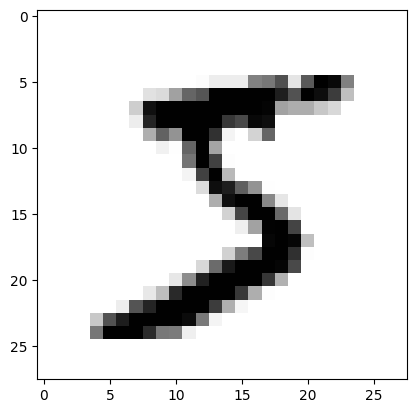

'5'

In [6]:
plt.imshow(some_digit_image, cmap="binary")
plt.show()
y[0]

In [7]:
y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [44]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [45]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [46]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [47]:
sgd_clf.predict([some_digit])

array([ True])

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [49]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [50]:
cross_val_score(Never5Classifier(), X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [51]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [52]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train_5, y_train_pred)
matrix

array([[53892,   687],
       [ 1891,  3530]])

In [53]:
TP = matrix[1][1]
TN = matrix[0][0]
FN = matrix[1][0]
FP = matrix[0][1]

In [54]:
# Precision, uma vez que disse que é positivo, qual a chance de realmente ser positivo
# Calculo é os verdadeiros positivos dividido por tudo que é dito positivo

precision = TP/(TP + FP)
precision

np.float64(0.8370879772350012)

In [55]:
# Recall, o quanto eu identifico dos positivos, se for 80%, significa que encontra 80% dos casos de interesse
# Calculo é verdadeiro positivo dividio por tudo que realmente é positivo

recall = TP/(TP + FN)
recall

np.float64(0.6511713705958311)

In [56]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [57]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [58]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [59]:
threshold = 8000
y_some_digit_predict = (y_score > threshold)
y_some_digit_predict

array([False])

In [60]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [61]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

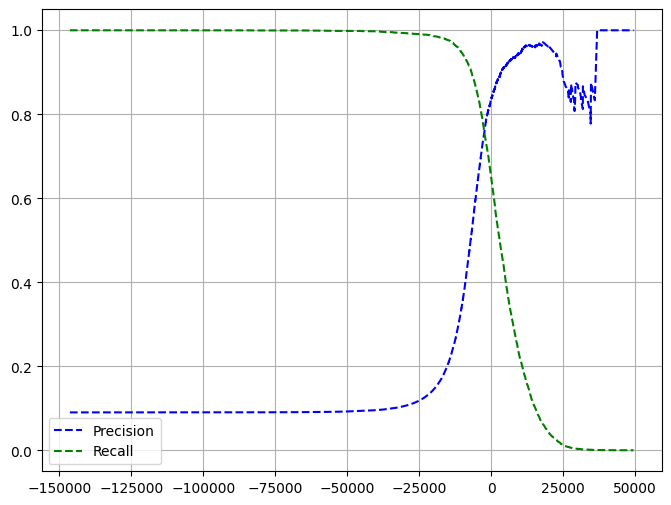

In [62]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.legend(loc="best")
    plt.grid(True)
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [63]:
precision90 = thresholds[np.argmax(precisions >= 0.9)]
precision90

np.float64(3370.019499143956)

In [64]:
y_train_pred_90 = (y_scores >= precision90)


In [65]:
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


In [66]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

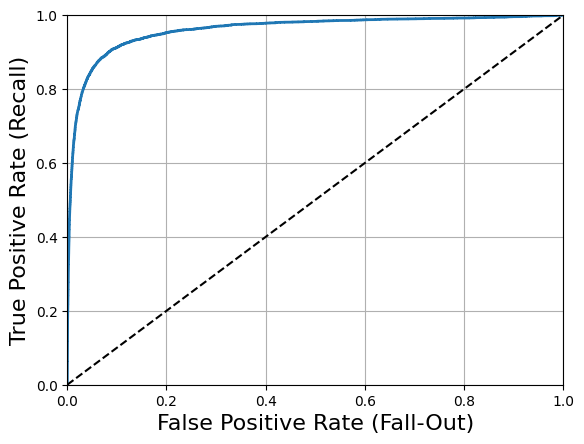

In [67]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2 ,label=label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 
    
plot_roc_curve(fpr,tpr)
plt.show()

In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_train_pred)


np.float64(0.8192920558800075)

In [78]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

y_prob_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [73]:
forest_clf.fit(X_train, y_train_5)

RandomForestClassifier()

In [ ]:
y_prob_forest2 = forest_clf.predict_proba(X_train)
print(len(y_prob_forest), len(y_prob_forest2))

60000 60000


In [80]:
y_prob_forest = y_prob_forest[:,1]
y_prob_forest

array([0.82, 0.01, 0.02, ..., 0.99, 0.06, 0.06])

In [82]:
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_5, y_prob_forest)

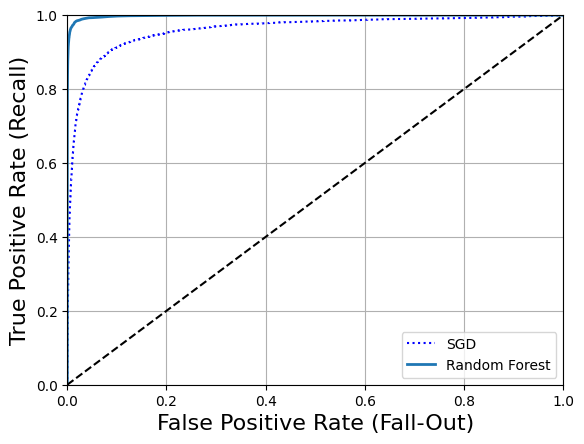

In [85]:
plt.plot(fpr,tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [88]:
roc_auc_score(y_train_5, y_prob_forest)

np.float64(0.99837941653831)

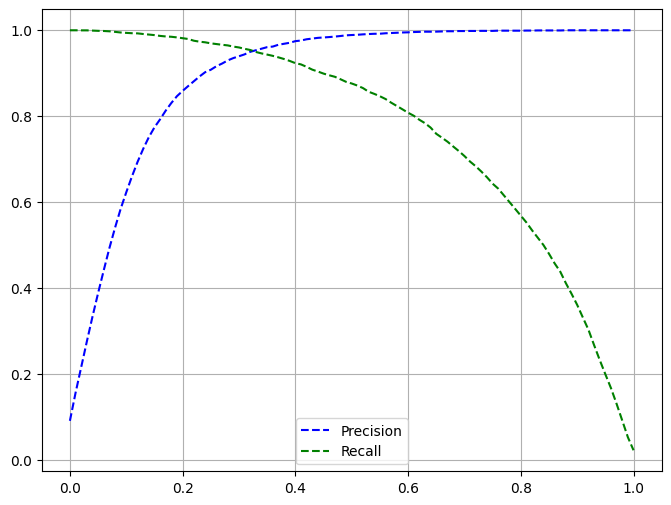

In [94]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_prob_forest)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [102]:
y_pred_forest = y_prob_forest > 0.4
print("Precision:", precision_score(y_train_5, y_pred_forest))
print("Recall: ", recall_score(y_train_5, y_pred_forest))

Precision: 0.9761345852895149
Recall:  0.9204943737317838


## Classificação multiclasse

In [ ]:
from sklearn.svm import SVC
# Está usando a estratégia one-versus-one
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [106]:
score = svm_clf.decision_function([some_digit])
score

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [107]:
np.argmax(score)

np.int64(5)

In [108]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [109]:
# from sklearn.multiclass import OneVsRestClassifier

# Leva muito tempo para treinar

# ovr_clf = OneVsRestClassifier(SVC())
# ovr_clf.fit(X_train, y_train)
# ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [110]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [111]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [113]:
cross_val_score(sgd_clf, X_train, y_train, scoring="accuracy", cv=3)

array([0.87365, 0.85835, 0.8689 ])

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, scoring="accuracy", cv=3)
#83

array([0.8983, 0.891 , 0.9018])

In [117]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=2)

c:\Users\LIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [118]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5601,    0,   26,    7,   11,   53,   39,    6,  179,    1],
       [   0, 6427,   45,   21,    4,   48,    4,   11,  171,   11],
       [  31,   32, 5279,   90,   65,   25,   74,   46,  303,   13],
       [  29,   24,  125, 5238,    2,  224,   26,   45,  337,   81],
       [  15,   14,   52,   12, 5246,   10,   39,   24,  262,  168],
       [  33,   17,   32,  173,   50, 4486,   79,   23,  452,   76],
       [  29,   19,   46,    2,   48,   95, 5560,    5,  113,    1],
       [  18,   12,   58,   27,   53,    9,    4, 5731,  130,  223],
       [  19,   67,   57,   82,    4,  122,   31,   10, 5395,   64],
       [  22,   17,   36,   62,  133,   28,    1,  182,  287, 5181]])

In [165]:
from sklearn.metrics import accuracy_score

# 1. Calcula a acurácia
acuracia = accuracy_score(y_train, y_train_pred)

# 2. Imprime o resultado
print(f"A acurácia no conjunto de treino é: {acuracia:.4f}")

A acurácia no conjunto de treino é: 0.9024


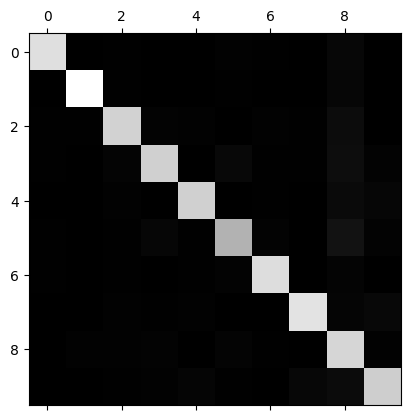

In [120]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [123]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_row_conf_mx = conf_mx/ row_sums
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [129]:
norm_row_conf_mx

array([[0.        , 0.        , 0.00438967, 0.00118183, 0.00185717,
        0.00894817, 0.0065845 , 0.001013  , 0.03022117, 0.00016883],
       [0.        , 0.        , 0.00667458, 0.0031148 , 0.0005933 ,
        0.00711955, 0.0005933 , 0.00163156, 0.02536339, 0.00163156],
       [0.00520309, 0.00537093, 0.        , 0.01510574, 0.0109097 ,
        0.00419604, 0.01242028, 0.00772071, 0.05085599, 0.00218194],
       [0.00473006, 0.00391453, 0.02038819, 0.        , 0.00032621,
        0.03653564, 0.00424074, 0.00733975, 0.05496656, 0.01321155],
       [0.00256761, 0.00239644, 0.00890106, 0.00205409, 0.        ,
        0.00171174, 0.0066758 , 0.00410818, 0.04484765, 0.02875727],
       [0.00608744, 0.00313595, 0.00590297, 0.03191293, 0.00922339,
        0.        , 0.01457296, 0.00424276, 0.08337945, 0.01401955],
       [0.0049003 , 0.00321054, 0.0077729 , 0.00033795, 0.00811085,
        0.01605272, 0.        , 0.00084488, 0.01909429, 0.00016898],
       [0.0028731 , 0.0019154 , 0.0092577

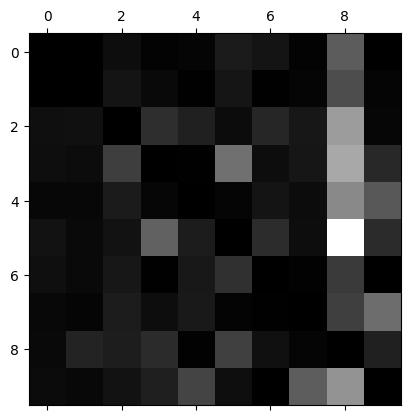

In [128]:
np.fill_diagonal(norm_row_conf_mx, 0)
plt.matshow(norm_row_conf_mx, cmap=plt.cm.grey)
plt.show()

In [130]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

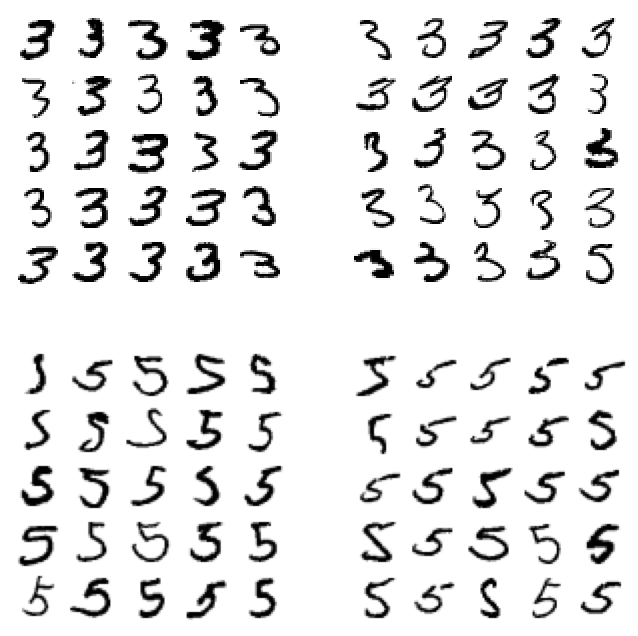

In [136]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [138]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train >= 7
y_train_odd = ((y_train % 2) ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [139]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [144]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [149]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

In [150]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [151]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

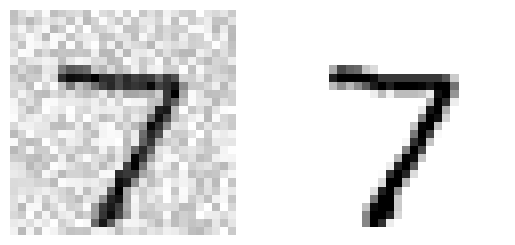

In [153]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

In [155]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])

In [156]:
clean_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

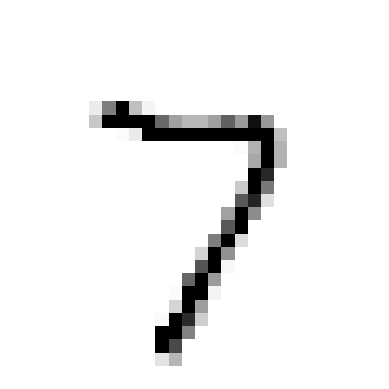

In [157]:
plot_digit(clean_digit)

## Exercicios

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier()
X_prepared = StandardScaler().fit_transform(X_train.astype(np.float64))

In [13]:
knn.fit(X_prepared, y_train)

KNeighborsClassifier()

In [163]:
cross_val_score(knn, X_prepared, y_train, cv=3, scoring="accuracy")

array([0.9376, 0.9411, 0.9424])

In [169]:
y_pred = knn.predict(X_prepared)

In [171]:
accuracy_score(y_train, y_pred)

0.96425

In [11]:
X_min = X_prepared[:10000]
y_min = y_train[:10000]

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_neighbors": [3], "weights": ["uniform", "distance"], "leaf_size": [1,2,3,5,6]},
]

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=2, scoring="accuracy", return_train_score=True, n_jobs=-1)
grid_search.fit(X_min, y_min)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'leaf_size': [1, 2, 3, 5, 6], 'n_neighbors': [8],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [22]:
grid_search.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=8, weights='distance')

In [36]:
knn = KNeighborsClassifier(n_neighbors= 10, weights="distance", leaf_size=5)

In [37]:
knn.fit(X_prepared, y_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=10, weights='distance')

In [ ]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler().fit_transform(X_train.astype(np.float64))
X_train_prep = StandardScaler().fit_transform(X_train.astype(np.float64))

X_test_prep = 
y_pred_train = knn.predict(X_prepared)
y_pred_test = knn.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print("Teste: ",accuracy_score(y_test, y_pred_test))
print("Validação: ",accuracy_score(y_train, y_pred_train))

Teste:  0.9436
Validação:  0.83885
